## 3. Dense Neural Netowork I

In this notebook we design the first Neural Network using a default dense layer design. We train the model over 300 epochs (it took 12 hours!) and get a maximum accuracy of over 98% and by the end the performance hovers around 92%. Almost 4% better than our benchmark algorithm. 

In [56]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# fix random seed for reproducibility
np.random.seed(7)

test_path = 'C:\\Users\\Louie\\Data\\Springboard_Cap2\\Test\\'
train_path = 'C:\\Users\\Louie\\Data\\Springboard_Cap2\\Train\\'

Here we build the model, very simple design for the first run through

In [52]:
model = Sequential()
model.add(Dense(50, input_dim=13244, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Collect test data which the algorithm isn't trained on

In [33]:
#Create set of test data to sample from

dfs = []

for index, file in enumerate(os.listdir(os.fsencode(test_path))):
    df = pd.read_csv(test_path + str(os.fsdecode(file)), header=None)
    dfs.append(df)

test = pd.concat(dfs)

C:\Users\Louie\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  """


Below we define helper functions for training the model. The function iterates through the entire dataset, completing one epoch. Each file is read into a dataframe, seperated into the features and labels, then updates the model (using Stochastic Gradient Descent). Every fifty files an accuracy measure is created by sampling from the test data. 

In [23]:
#Custom encoder.. necessary because batch files have only one label category

def custom_encoder(label):
    if label == 0:
        return np.array([1,0,0])
    elif label == 1:
        return np.array([0,1,0])
    else:
        return np.array([0,0,1])

In [53]:
import os

#Custom training code..iterate through files Stochastically training the model
#Test every 10 updates to track metrics

def train_epoch(path, model, perf):

    for index, file in enumerate(os.listdir(os.fsencode(path))):
        df = pd.read_csv(path + str(os.fsdecode(file)), header=None)
        
        data = df.iloc[:,:-1]
        
        #Very ugly..I know
        labels = np.concatenate(df[13244].astype(int).apply(custom_encoder).values).reshape(-1,3)
        
        model.train_on_batch(data, labels)
        
        if index % 50 == 0:
            random_test = test.sample(frac=0.5)
            test_labels = np.concatenate(random_test[13244].astype(int).apply(custom_encoder).values).reshape(-1,3)
            score = model.test_on_batch(random_test.iloc[:,:-1], test_labels)
            perf.append(score[1])
    

Train the model on 300 epochs of data and track the performance.

In [54]:
perf = []

for _ in range(300):
    train_epoch(train_path, model, perf)

max(perf)

C:\Users\Louie\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  


0.9846154

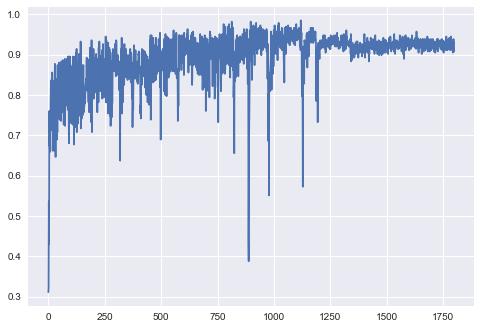

In [57]:
plt.plot(perf)

In [58]:
perf[-10:]

[0.92,
 0.9107692,
 0.9169231,
 0.9046154,
 0.92,
 0.92923075,
 0.93846154,
 0.92923075,
 0.92923075,
 0.9076923]

Performance here is solid and imporved upon our benchmark considerably however there is an issue with the data which I believe is limiting the model. Each file has only one cateogry of data and even more concerning is all data that is similar in time frame meaning all the images are very similar. When training the model each file causes an update to the model parameters. By training on very similar data that is not represenative of population the model may be overfitting with each update creating sporadic performance and limiting the precision of the model. In the next section I reshuffle the data to help remedy this issue.